##### 题目一： 
下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有票的keys打印出来。（提示：指定sheetname为None可以读取所有数据）

In [16]:
import numpy as np
import pandas as pd
from datetime import datetime
file = pd.ExcelFile('sz50.xlsx')
getname = file.sheet_names
#print(file.sheet_names)
data_dict = {}
for gn in getname:
    data_dict[gn] =  pd.read_excel('sz50.xlsx',sheetname=gn, index_col='datetime')
data = data_dict
print(data.keys())

dict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


##### 题目二：
读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

In [17]:
#print(data)
PN = pd.Panel(data)
#print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 50 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600000.XSHG to 601989.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


In [18]:
MI = PN.to_frame(False)
#print(round(MI.head(),1))

In [19]:
stock36 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')
#print(stock36)
arr36 = np.array(stock36['close'], dtype='float64')
print(arr36)

[ 69.31  69.42  69.85  69.35  69.23  69.23  69.27  69.46  70.27  71.62
  71.2   71.74  71.47  71.66  71.39  72.78  72.86  73.32  72.2   71.78
  71.7   71.78  72.36  72.94  73.24  72.78  73.82  73.82  73.4   74.94
  74.87  74.9   74.79  75.02  74.98  75.06  74.67  73.75  73.32  73.55
  74.21  74.52  73.44  72.94  73.44  73.67  73.44  73.55  72.94  72.36
  72.36  71.51  71.97  72.43  73.67  73.24  73.63  73.4   74.09  73.63
  73.44  72.97  73.01  73.36  73.51  73.01  72.63  72.9   71.78  71.31
  70.93  72.51  73.05  73.17  73.71  73.24  73.78  73.36  73.05  72.36
  72.51  72.51  72.47  73.4   74.33  78.49  79.8   79.11  77.91  78.15
  79.23  80.62  84.24  84.55  88.56  87.37  86.52  87.18  85.52  84.82
  84.63  86.91  87.75  88.41  88.14  86.79  84.99  83.52  83.04  84.44
  84.12  85.03  90.7   91.9   91.94  97.2   94.97  96.37  95.33  93.85
  91.78  95.37  95.61  92.82  92.82  96.09  97.12  99.36 100.48 100.2
  97.84 100.64 100.56  98.72 102.59 101.87 101.59 103.35 102.87 102.03
 104.31

In [26]:
import talib as ta
MA36 = ta.MA(arr36, 10)
print(MA36[-5:])

[108.35  108.741 109.176 110.102 111.666]


##### 题目三：
将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

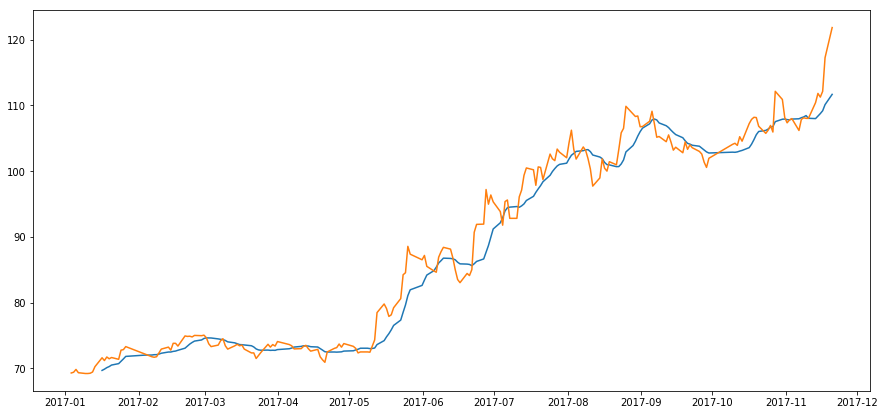

In [28]:
import matplotlib.pyplot as plt
s_1 = pd.Series(MA36,data['600036.XSHG'].index)
s_2 = pd.Series()
plt.figure(figsize=(15, 7))
plt.plot(s_1.index, s_1)
plt.plot(data['600036.XSHG'].index,data['600036.XSHG']['close'])
plt.show()

##### 题目四：
用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

In [30]:
dataIndex = data['600000.XSHG'].index
#print(dataIndex)

DatetimeIndex(['2017-01-03 15:00:00', '2017-01-04 15:00:00',
               '2017-01-05 15:00:00', '2017-01-06 15:00:00',
               '2017-01-09 15:00:00', '2017-01-10 15:00:00',
               '2017-01-11 15:00:00', '2017-01-12 15:00:00',
               '2017-01-13 15:00:00', '2017-01-16 15:00:00',
               ...
               '2017-11-07 15:00:00', '2017-11-08 15:00:00',
               '2017-11-09 15:00:00', '2017-11-10 15:00:00',
               '2017-11-13 15:00:00', '2017-11-14 15:00:00',
               '2017-11-15 15:00:00', '2017-11-16 15:00:00',
               '2017-11-17 15:00:00', '2017-11-20 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=215, freq=None)


In [40]:
ROCR100DF = pd.DataFrame(dataIndex)
for gn in data.keys():
    closePrice = data[gn]['close'].values
    ROCR100Array = ta.ROCR100(closePrice,timeperiod = 20)
    ROCR100 = pd.DataFrame(ROCR100Array,index = data[gn].index.values,
                           columns = [gn])
    ROCR100DF = pd.merge(ROCR100DF, ROCR100,left_index = True, right_index = True,how = 'left')
    
p1,=plt.plot(ROCR100DF.index, ROCR100DF.iloc[:,0])
p2,=plt.plot(ROCR100DF.index, ROCR100DF.iloc[:,1])    
p3,=plt.plot(ROCR100DF.index, ROCR100DF.iloc[:,2])
p4,=plt.plot(ROCR100DF.index, ROCR100DF.iloc[:,3])
p5,=plt.plot(ROCR100DF.index, ROCR100DF.iloc[:,4]) 
plt.legend([p1,p2,p3,p4,p5],ROCR100DF.columns.values[0:5])
plt.show()

KeyError: 'close'

hummm actually i failed to finished question 4 :(